In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv(r'D:\bmw_car_sales_classification.csv')
df.head(10)


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low
5,5 Series,2017,Middle East,Silver,Diesel,Manual,1.9,171362,42926,1232,Low
6,i8,2022,Europe,White,Diesel,Manual,1.8,196741,55064,7949,High
7,M5,2014,Asia,Black,Diesel,Automatic,1.6,121156,102778,632,Low
8,X3,2016,South America,White,Diesel,Automatic,1.7,48073,116482,8944,High
9,i8,2019,Europe,White,Electric,Manual,3.0,35700,96257,4411,Low


In [4]:
cat_var=df.select_dtypes(include=['object']).columns

In [5]:
cat_var

Index(['Model', 'Region', 'Color', 'Fuel_Type', 'Transmission',
       'Sales_Classification'],
      dtype='object')

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df['Model'])
df['Model']=le.transform(df['Model'])
       

In [7]:
le1=LabelEncoder()
le1.fit(df['Region'])
df['Region']=le1.transform(df['Region'])

In [8]:
le2=LabelEncoder()
le2.fit(df['Color'])
df['Color']=le2.transform(df['Color'])

In [9]:
le3=LabelEncoder()
le3.fit(df['Fuel_Type'])
df['Fuel_Type']=le3.transform(df['Fuel_Type'])

In [10]:
le4=LabelEncoder()
le4.fit(df['Transmission'])
df['Transmission']=le4.transform(df['Transmission'])

In [11]:
le5=LabelEncoder()
le5.fit(df['Sales_Classification'])
df['Sales_Classification']=le5.transform(df['Sales_Classification'])
df.head(10)

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,1,2016,1,3,3,1,3.5,151748,98740,8300,0
1,10,2013,4,3,2,0,1.6,121671,79219,3428,1
2,1,2022,4,1,3,0,4.5,10991,113265,6994,1
3,6,2024,3,1,3,0,1.7,27255,60971,4047,1
4,2,2020,5,0,0,1,2.1,122131,49898,3080,1
5,1,2017,3,4,0,1,1.9,171362,42926,1232,1
6,10,2022,2,5,0,1,1.8,196741,55064,7949,0
7,4,2014,1,0,0,0,1.6,121156,102778,632,1
8,6,2016,5,5,0,0,1.7,48073,116482,8944,0
9,10,2019,2,5,1,1,3.0,35700,96257,4411,1


In [12]:
x=df.iloc[:,:-1]
y=df['Sales_Classification']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=51)

In [15]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [16]:
dc.score(x_train,y_train)*100, dc.score(x_test,y_test)*100


(100.0, 100.0)

In [17]:
dc.predict([[1,2016,1,3,3,1,3.5,151748,98740,8300]])

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
rf.score(x_train,y_train)*100, rf.score(x_test,y_test)*100


(100.0, 100.0)

In [20]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

In [21]:
cm=confusion_matrix(y_test,dc.predict(x_test))
cm

array([[3001,    0],
       [   0, 6999]], dtype=int64)

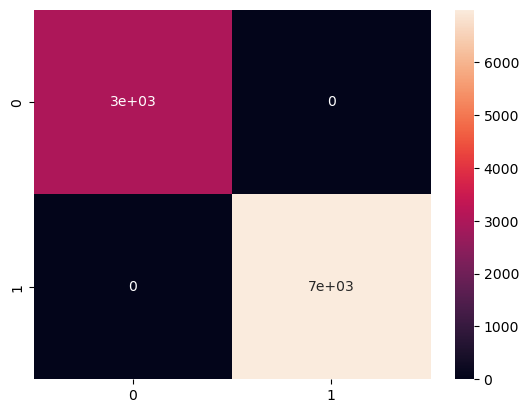

In [22]:
sns.heatmap(cm,annot=True)
plt.show()

In [23]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier(estimator=RandomForestClassifier(),n_estimators=10)
bc.fit(x_train,y_train)

,estimator,RandomForestClassifier()
,n_estimators,10
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,None
,verbose,0


In [24]:
bc.score(x_train,y_train)*100, bc.score(x_test,y_test)*100


(100.0, 100.0)